In [1]:
# Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data_src = "heart_2020_cleaned.csv"
df = pd.read_csv(data_src)

In [3]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


# Data Preprocessing
1. Checking for null values


2. Checking for outliers


3. Checking for imbalanced data (Data standardisation)


4. Feature engineering and selection


5. Dataframe splitting and fitting

## 2.1 Data Cleaning
### 2.1.1 Null values

In [4]:
print(df.isnull().sum().sort_values(ascending=False))

HeartDisease        0
BMI                 0
KidneyDisease       0
Asthma              0
SleepTime           0
GenHealth           0
PhysicalActivity    0
Diabetic            0
Race                0
AgeCategory         0
Sex                 0
DiffWalking         0
MentalHealth        0
PhysicalHealth      0
Stroke              0
AlcoholDrinking     0
Smoking             0
SkinCancer          0
dtype: int64


There is no null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 2.1.2 Encoding Binary Categorica

In [6]:
df['Smoking'] = pd.Series(np.where(df['Smoking'] == 'Yes', 1, 0))
df['AlcoholDrinking'] = pd.Series(np.where(df['AlcoholDrinking'] == 'Yes', 1, 0))
df['Stroke'] = pd.Series(np.where(df['Stroke'] == 'Yes', 1, 0))
df['DiffWalking'] = pd.Series(np.where(df['DiffWalking'] == 'Yes', 1, 0))
df['PhysicalActivity'] = pd.Series(np.where(df['PhysicalActivity'] == 'Yes', 1, 0))
df['Asthma'] = pd.Series(np.where(df['Asthma'] == 'Yes', 1, 0))
df['KidneyDisease'] = pd.Series(np.where(df['KidneyDisease'] == 'Yes', 1, 0))
df['SkinCancer'] = pd.Series(np.where(df['SkinCancer'] == 'Yes', 1, 0))
df['HeartDisease'] = pd.Series(np.where(df['HeartDisease'] == 'Yes', 1, 0))

### 2.1.3 Encoding Categorical with more than 2 values

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['AgeCategory']=le.fit_transform(df['AgeCategory'])
df['Race']=le.fit_transform(df['Race'])
df['Diabetic']=le.fit_transform(df['Diabetic'])
df['GenHealth']=le.fit_transform(df['GenHealth'])

In [8]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int32  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int32  
 3   AlcoholDrinking   319795 non-null  int32  
 4   Stroke            319795 non-null  int32  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int32  
 8   Sex               319795 non-null  int32  
 9   AgeCategory       319795 non-null  int32  
 10  Race              319795 non-null  int32  
 11  Diabetic          319795 non-null  int32  
 12  PhysicalActivity  319795 non-null  int32  
 13  GenHealth         319795 non-null  int32  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int32  
 16  KidneyDisease     31

## 2.2 Data Visualisation
### 2.2.1 Data Correlation & Distribution

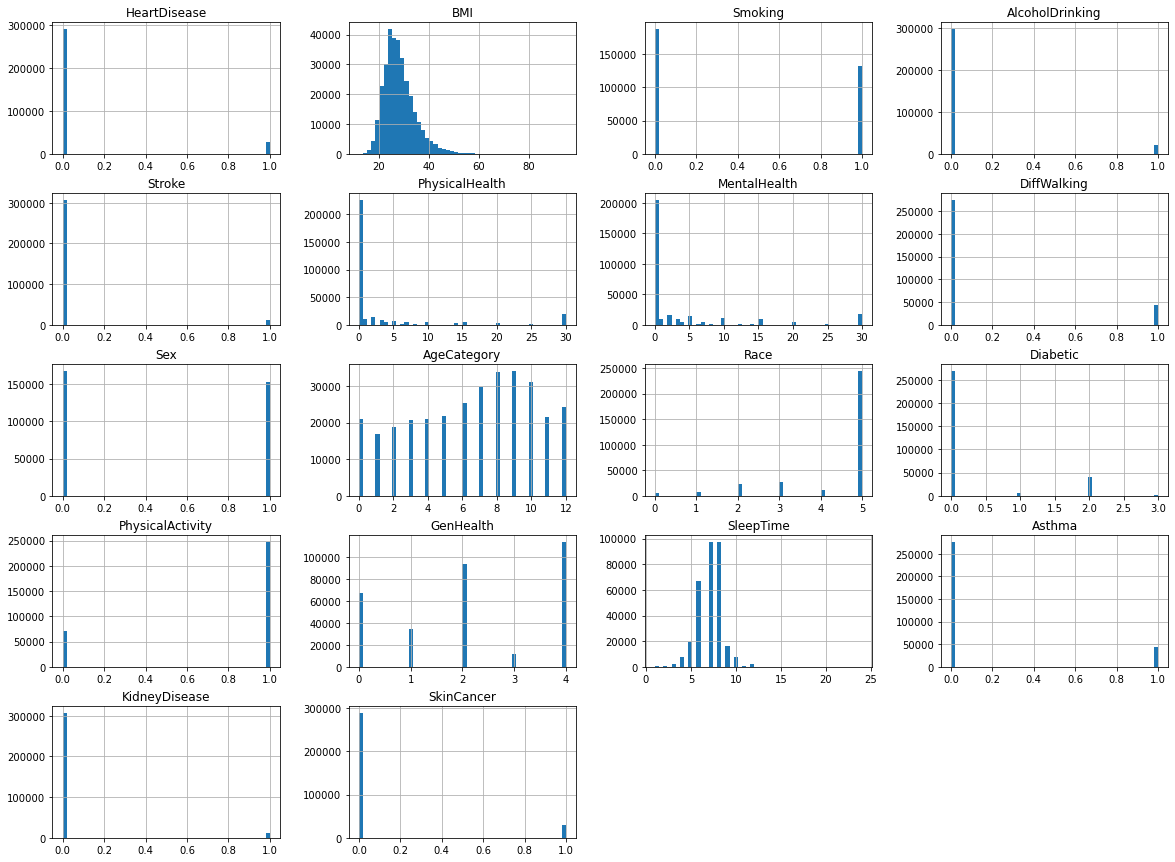

In [10]:
# Histogram
df.hist(bins=50, figsize=(20,15))
plt.show()

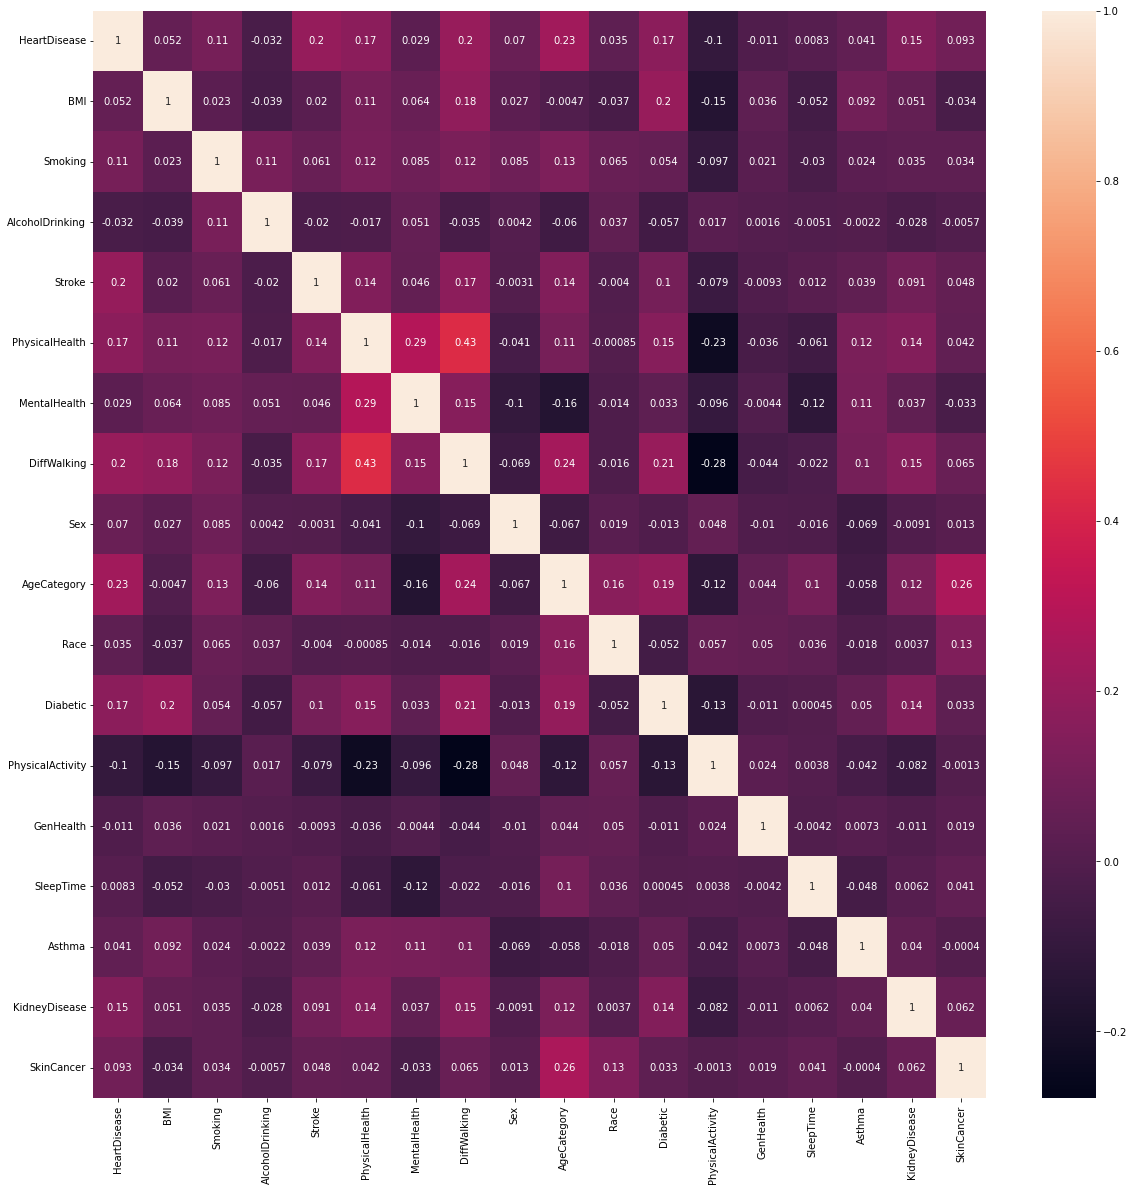

In [11]:
# Heatmap
corr_matrix = df.corr()
plt.figure(figsize = (20,20))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

### 2.2.2 Removing unnecessary features

In [12]:
df.drop(['AlcoholDrinking','PhysicalActivity','GenHealth', 'SleepTime'],axis=1,inplace=True)

## 2.3 Outliers

HeartDisease         AxesSubplot(0.125,0.772143;0.168478x0.107857)
BMI               AxesSubplot(0.327174,0.772143;0.168478x0.107857)
Smoking           AxesSubplot(0.529348,0.772143;0.168478x0.107857)
Stroke            AxesSubplot(0.731522,0.772143;0.168478x0.107857)
PhysicalHealth       AxesSubplot(0.125,0.642714;0.168478x0.107857)
MentalHealth      AxesSubplot(0.327174,0.642714;0.168478x0.107857)
DiffWalking       AxesSubplot(0.529348,0.642714;0.168478x0.107857)
Sex               AxesSubplot(0.731522,0.642714;0.168478x0.107857)
AgeCategory          AxesSubplot(0.125,0.513286;0.168478x0.107857)
Race              AxesSubplot(0.327174,0.513286;0.168478x0.107857)
Diabetic          AxesSubplot(0.529348,0.513286;0.168478x0.107857)
Asthma            AxesSubplot(0.731522,0.513286;0.168478x0.107857)
KidneyDisease        AxesSubplot(0.125,0.383857;0.168478x0.107857)
SkinCancer        AxesSubplot(0.327174,0.383857;0.168478x0.107857)
dtype: object

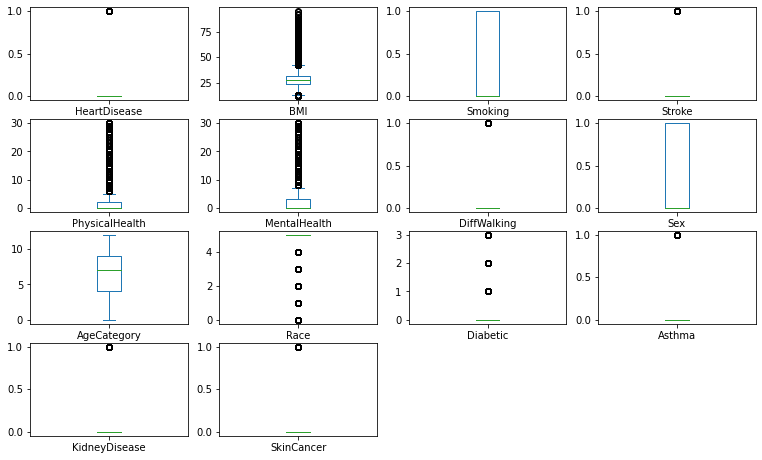

In [13]:
df.plot(kind="box", subplots=True, layout=(6,4), figsize=(13,12))

### 2.3.1 Removing BMI Outliers

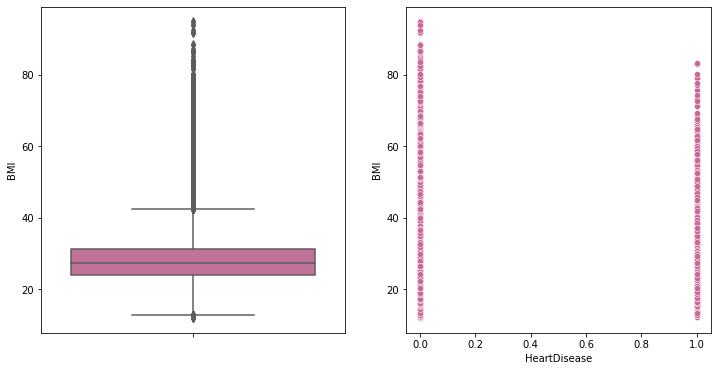

In [14]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df,y='BMI',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df,x='HeartDisease',y='BMI',color='#cc6699')
plt.show()

In [15]:
x=df[df['BMI']>100]
x.shape

(0, 14)

In [16]:
df=df[df['BMI']<=100]

## 2.4 Data Splitting

In [17]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']
print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (319795, 13) 
 y_shape: (319795,)


### 2.4.1 Random Over-Sampling to deal with Imbalanced Data

In [18]:
from imblearn.over_sampling  import RandomOverSampler

In [19]:
smoteOver = RandomOverSampler(sampling_strategy=1)

In [20]:
X_smoteOver, y_smoteOver = smoteOver.fit_resample(X,y)

In [21]:
print(f' X_shape: {X_smoteOver.shape} \n y_shape: {y_smoteOver.shape}')

 X_shape: (584844, 13) 
 y_shape: (584844,)


## 2.5 Data Standardization

In [22]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()

In [23]:
# Without sampling
X = scl.fit_transform(X)

In [24]:
# with Random Oversampling
X_smoteOver = scl.fit_transform(X_smoteOver)

### 2..51 Data Splitting

In [25]:
# Without Sampling:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)
print(f' X_train: {X_train.shape} & X_test: {X_test.shape}')
print(f' y_train: {y_train.shape} & y_test: {y_test.shape}')

 X_train: (255836, 13) & X_test: (63959, 13)
 y_train: (255836,) & y_test: (63959,)


In [26]:
# With Oversampling
from sklearn.model_selection import train_test_split
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_smoteOver,y_smoteOver,test_size=0.20,shuffle=True,random_state=0)
print(f' X_train: {X_train_res.shape} & X_test: {X_test_res.shape}')
print(f' y_train: {y_train_res.shape} & y_test: {y_test_res.shape}')

 X_train: (467875, 13) & X_test: (116969, 13)
 y_train: (467875,) & y_test: (116969,)


In [27]:
# Evaluation imports:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [28]:
# Function to plot the confusion matrix:
def cmatrix_fun(model_name, actual, predicted):
    # check the confusion matrix
    cm = confusion_matrix(actual, predicted) 
    print(cm)

    # Plot the CM
    ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

    ax.set_title(f'The confusion matrix using {model_name} Classifier \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    # Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

In [29]:
# Function to check the classification report
def classification_report_fun(model_name, actual, predicted):
    print(f'The Classification Report for {model_name} Classifier:')
    print(classification_report(actual, predicted))

## 2.6 Modelling

### 2.6.1 RandomForest

In [30]:
#Before Sampling:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf_clf = RandomForestClassifier(criterion='entropy',n_estimators=20)

# Fit the parameters before oversampling:
rf_clf.fit(X_train, y_train)

# Predict
y_pred_test = rf_clf.predict(X_test)
y_pred_train = rf_clf.predict(X_train)

In [31]:
# After Random Oversampling:

rf_clf_res = RandomForestClassifier(criterion='entropy',n_estimators=20)

# Fit the parameters After oversampling:
rf_clf_res.fit(X_train_res, y_train_res)

#predict
y_pred_test_res = rf_clf_res.predict(X_test_res)
y_pred_train_res = rf_clf_res.predict(X_train_res)

In [32]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train, y_pred_train)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test,y_pred_test)*100))
print('********************************************************')
print('********************************************************')
print('Accuracy of Train after Oversampling: {}'.format(accuracy_score(y_train_res,y_pred_train_res)*100))
print('Accuracy of Test after Oversampling: {}'.format(accuracy_score(y_test_res,y_pred_test_res)*100))

Accuracy of Train before sampling: 98.07298425553871
Accuracy of  Test before sampling: 89.82316796697884
********************************************************
********************************************************
Accuracy of Train after Oversampling: 96.92802564787604
Accuracy of Test after Oversampling: 93.75048089664783


[[52215  6246]
 [ 1064 57444]]


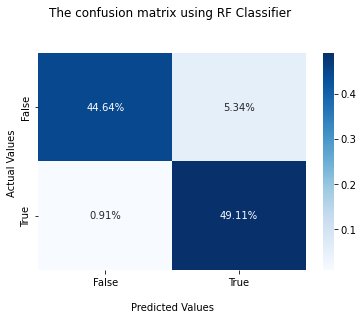

In [33]:
cmatrix_fun('RF', y_test_res, y_pred_test_res)

In [34]:
classification_report_fun('RF', y_test_res, y_pred_test_res)

The Classification Report for RF Classifier:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     58461
           1       0.90      0.98      0.94     58508

    accuracy                           0.94    116969
   macro avg       0.94      0.94      0.94    116969
weighted avg       0.94      0.94      0.94    116969



In [35]:
rf_model = pd.DataFrame({"Y_test": y_test_res, "Y_pred" : y_pred_test_res})
rf_model.head(10)

,Y_test,Y_pred
114267,0,0
364804,1,1
230608,1,1
274445,0,0
76729,0,0
583565,1,1
568253,1,1
174950,0,0
495139,1,1
230341,0,0


### 2.6.2 KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Applying KNeighborsClassifier Model 
KNNClassifierModel = KNeighborsClassifier(n_neighbors = 6)

In [37]:
# Without Sampling
KNNClassifierModel.fit(X_train, y_train)

#predict
y_pred_test_knn = KNNClassifierModel.predict(X_test)
y_pred_train_knn = KNNClassifierModel.predict(X_train)

In [38]:
# With Oversampling
KNNClassifierModel.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_knn = KNNClassifierModel.predict(X_test_res)
y_pred_train_res_knn = KNNClassifierModel.predict(X_train_res)

In [39]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_knn)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_knn)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_knn)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_knn)*100))

Accuracy of Train before sampling: 92.10939820822715
Accuracy of  Test before sampling: 91.28504198001845
********************************************************
Accuracy of Train after Random Oversampling: 90.47053165909699
Accuracy of Test after Random Oversampling: 87.68391625131446


[[46642 11819]
 [ 2587 55921]]


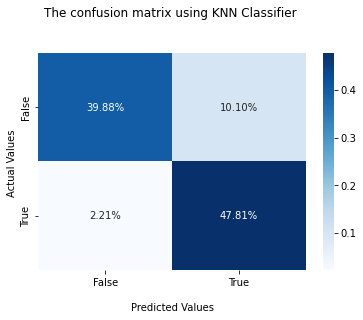

In [40]:
cmatrix_fun('KNN', y_test_res, y_pred_test_res_knn)

In [41]:
classification_report_fun("KNN", y_test_res, y_pred_test_res_knn)

The Classification Report for KNN Classifier:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     58461
           1       0.83      0.96      0.89     58508

    accuracy                           0.88    116969
   macro avg       0.89      0.88      0.88    116969
weighted avg       0.89      0.88      0.88    116969



### 2.6.3. Logistic Regression

In [42]:
# import
from sklearn.linear_model import LogisticRegression

# Applying LogisticRegression Model 
LogisticRegressionModel = LogisticRegression(penalty = 'l2', solver = 'sag', C = 1, random_state = 33)

In [43]:
# Without Sampling
LogisticRegressionModel.fit(X_train, y_train)

#predict
y_pred_test_lr = LogisticRegressionModel.predict(X_test)
y_pred_train_lr = LogisticRegressionModel.predict(X_train)

In [44]:
# With Random Oversampling
LogisticRegressionModel.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_lr = LogisticRegressionModel.predict(X_test_res)
y_pred_train_res_lr = LogisticRegressionModel.predict(X_train_res)

In [45]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_lr)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_lr)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_lr)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_lr)*100))

Accuracy of Train before sampling: 91.50588658359261
Accuracy of  Test before sampling: 91.50080520333339
********************************************************
Accuracy of Train after Random Oversampling: 75.14699438952712
Accuracy of Test after Random Oversampling: 75.16863442450564


[[58044   468]
 [ 4968   479]]


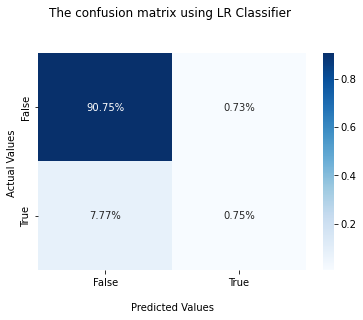

In [46]:
cmatrix_fun('LR', y_test, y_pred_test_lr)

In [47]:
classification_report_fun("LR", y_test, y_pred_test_lr)

The Classification Report for LR Classifier:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58512
           1       0.51      0.09      0.15      5447

    accuracy                           0.92     63959
   macro avg       0.71      0.54      0.55     63959
weighted avg       0.89      0.92      0.89     63959



### 2.6.4 XGB

In [48]:
from xgboost import XGBClassifier


xgb = XGBClassifier()

In [49]:
# Without Sampling
xgb.fit(X_train, y_train)

#predict
y_pred_test_xgb = xgb.predict(X_test)
y_pred_train_xgb = xgb.predict(X_train)

In [50]:
# With Random Oversampling
xgb.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_xgb = xgb.predict(X_test_res)
y_pred_train_res_xgb = xgb.predict(X_train_res)

In [51]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_xgb)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_xgb)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_xgb)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_xgb)*100))

Accuracy of Train before sampling: 91.97220094122798
Accuracy of  Test before sampling: 91.52113072437031
********************************************************
Accuracy of Train after Random Oversampling: 77.5681538872562
Accuracy of Test after Random Oversampling: 77.26320649060862


[[58124   388]
 [ 5035   412]]


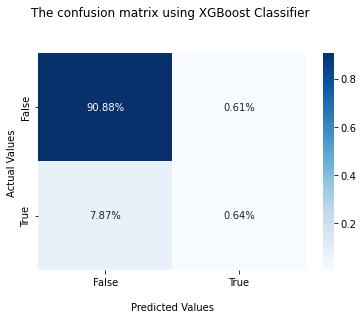

In [52]:
cmatrix_fun("XGBoost", y_test, y_pred_test_xgb)

In [53]:
classification_report_fun("XGBoost", y_test_res, y_pred_test_res_xgb)

The Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76     58461
           1       0.75      0.82      0.78     58508

    accuracy                           0.77    116969
   macro avg       0.77      0.77      0.77    116969
weighted avg       0.77      0.77      0.77    116969



### 2.6.5 Decision Tree

In [54]:
from sklearn.tree  import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_features = 8,max_depth = 8)

In [55]:
# Without Sampling
dt.fit(X_train, y_train)

#predict
y_pred_test_dt = dt.predict(X_test)
y_pred_train_dt = dt.predict(X_train)

In [56]:
# With Random Oversampling
dt.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_dt = dt.predict(X_test_res)
y_pred_train_res_dt = dt.predict(X_train_res)

In [57]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_dt)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_dt)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_dt)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_dt)*100))

Accuracy of Train before sampling: 91.64191122437812
Accuracy of  Test before sampling: 91.57585328100815
********************************************************
Accuracy of Train after Random Oversampling: 75.02409831685813
Accuracy of Test after Random Oversampling: 75.01047286033051


[[58238   274]
 [ 5114   333]]


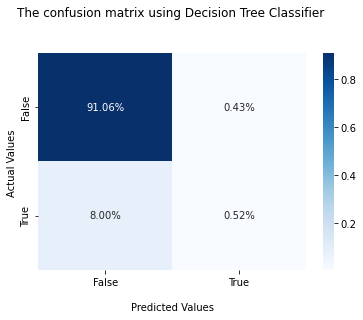

In [58]:
cmatrix_fun("Decision Tree", y_test, y_pred_test_dt)

In [59]:
classification_report_fun("Decision Tree", y_test_res, y_pred_test_res_dt)

The Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74     58461
           1       0.73      0.79      0.76     58508

    accuracy                           0.75    116969
   macro avg       0.75      0.75      0.75    116969
weighted avg       0.75      0.75      0.75    116969



### 2.6.6 GBM (Gradient Boosting)

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(max_depth = 8 , n_estimators= 6)

In [61]:
# Without Sampling
gb.fit(X_train, y_train)

#predict
y_pred_test_gb = gb.predict(X_test)
y_pred_train_gb = gb.predict(X_train)

In [62]:
# With Random Oversampling
gb.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_gb = gb.predict(X_test_res)
y_pred_train_res_gb = gb.predict(X_train_res)

In [63]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_gb)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_gb)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_gb)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_gb)*100))

Accuracy of Train before sampling: 91.45859065964133
Accuracy of  Test before sampling: 91.49611469847872
********************************************************
Accuracy of Train after Random Oversampling: 75.58706919583223
Accuracy of Test after Random Oversampling: 75.57130521762177


[[58507     5]
 [ 5434    13]]


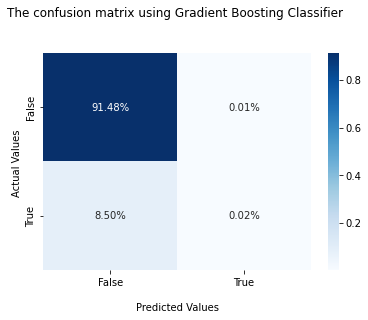

In [64]:
cmatrix_fun("Gradient Boosting", y_test, y_pred_test_gb)

In [65]:
classification_report_fun("Gradient Boostinge", y_test_res, y_pred_test_res_gb)

The Classification Report for Gradient Boostinge Classifier:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74     58461
           1       0.73      0.81      0.77     58508

    accuracy                           0.76    116969
   macro avg       0.76      0.76      0.76    116969
weighted avg       0.76      0.76      0.76    116969



### 2.6.7 Adaboost

In [66]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

In [67]:
# Without Sampling
ada.fit(X_train, y_train)

#predict
y_pred_test_ada = ada.predict(X_test)
y_pred_train_ada = ada.predict(X_train)

In [68]:
# With Random Oversampling
ada.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_ada = ada.predict(X_test_res)
y_pred_train_res_ada = ada.predict(X_train_res)

In [69]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_ada)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_ada)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_ada)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_ada)*100))

Accuracy of Train before sampling: 91.47070779718257
Accuracy of  Test before sampling: 91.49298769524226
********************************************************
Accuracy of Train after Random Oversampling: 75.12391130109538
Accuracy of Test after Random Oversampling: 75.10195008933991


[[57960   552]
 [ 4889   558]]


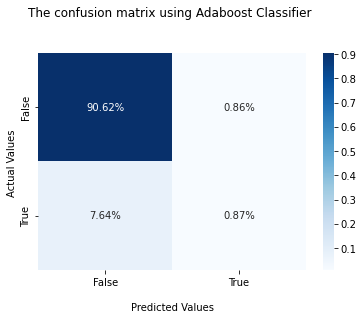

In [70]:
cmatrix_fun("Adaboost", y_test, y_pred_test_ada)

In [71]:
classification_report_fun("Gradient Boostinge", y_test_res, y_pred_test_res_ada)

The Classification Report for Gradient Boostinge Classifier:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75     58461
           1       0.75      0.76      0.75     58508

    accuracy                           0.75    116969
   macro avg       0.75      0.75      0.75    116969
weighted avg       0.75      0.75      0.75    116969



### 2.6.8 light GBM

In [72]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(max_depth = 8)

In [73]:
# Without Sampling
lgbm.fit(X_train, y_train)

#predict
y_pred_test_lgbm = lgbm.predict(X_test)
y_pred_train_lgbm = lgbm.predict(X_train)

In [74]:
# With Random Oversampling
lgbm.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_lgbm = lgbm.predict(X_test_res)
y_pred_train_res_lgbm = lgbm.predict(X_train_res)

In [75]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_lgbm)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_lgbm)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_lgbm)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_lgbm)*100))

Accuracy of Train before sampling: 91.71891367907565
Accuracy of  Test before sampling: 91.58992479557216
********************************************************
Accuracy of Train after Random Oversampling: 76.09575207053166
Accuracy of Test after Random Oversampling: 76.00560832357291


[[58234   278]
 [ 5101   346]]


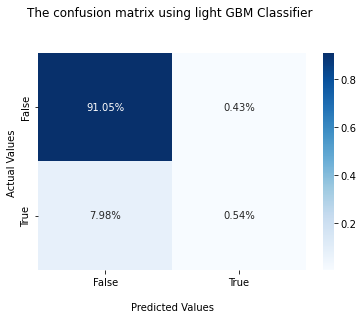

In [76]:
cmatrix_fun("light GBM", y_test, y_pred_test_lgbm)

In [77]:
classification_report_fun("Gradient Boostinge", y_test_res, y_pred_test_res_lgbm)

The Classification Report for Gradient Boostinge Classifier:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75     58461
           1       0.74      0.81      0.77     58508

    accuracy                           0.76    116969
   macro avg       0.76      0.76      0.76    116969
weighted avg       0.76      0.76      0.76    116969



### 2.6.9 CatBoost

In [78]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(max_depth = 10, iterations=10, learning_rate=0.4)

In [79]:
# Without Sampling
cb.fit(X_train, y_train)

#predict
y_pred_test_cb = cb.predict(X_test)
y_pred_train_cb = cb.predict(X_train)

0:	learn: 0.4606621	total: 179ms	remaining: 1.61s
1:	learn: 0.3571707	total: 210ms	remaining: 839ms
2:	learn: 0.3015619	total: 241ms	remaining: 562ms
3:	learn: 0.2710347	total: 269ms	remaining: 404ms
4:	learn: 0.2538246	total: 296ms	remaining: 296ms
5:	learn: 0.2441288	total: 324ms	remaining: 216ms
6:	learn: 0.2377030	total: 355ms	remaining: 152ms
7:	learn: 0.2335423	total: 386ms	remaining: 96.6ms
8:	learn: 0.2312759	total: 422ms	remaining: 46.9ms
9:	learn: 0.2295657	total: 455ms	remaining: 0us


In [80]:
# With Random Oversampling
cb.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_cb = cb.predict(X_test_res)
y_pred_train_res_cb = cb.predict(X_train_res)

0:	learn: 0.5918850	total: 64.6ms	remaining: 581ms
1:	learn: 0.5461751	total: 136ms	remaining: 545ms
2:	learn: 0.5235527	total: 210ms	remaining: 490ms
3:	learn: 0.5115391	total: 275ms	remaining: 413ms
4:	learn: 0.5051339	total: 340ms	remaining: 340ms
5:	learn: 0.5007243	total: 397ms	remaining: 265ms
6:	learn: 0.4977540	total: 457ms	remaining: 196ms
7:	learn: 0.4960409	total: 510ms	remaining: 128ms
8:	learn: 0.4946178	total: 579ms	remaining: 64.3ms
9:	learn: 0.4930153	total: 628ms	remaining: 0us


In [81]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_cb)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_cb)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_cb)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_cb)*100))

Accuracy of Train before sampling: 91.70249691208431
Accuracy of  Test before sampling: 91.61337731984553
********************************************************
Accuracy of Train after Random Oversampling: 76.05599786267699
Accuracy of Test after Random Oversampling: 75.99021963084236


[[58251   261]
 [ 5103   344]]


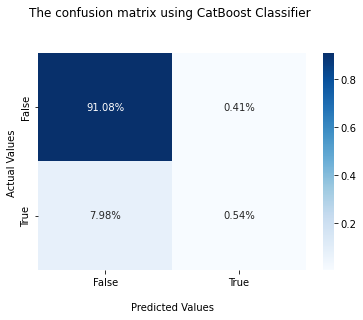

In [82]:
cmatrix_fun("CatBoost", y_test, y_pred_test_cb)

In [83]:
classification_report_fun("CatBoost", y_test_res, y_pred_test_res_cb)

The Classification Report for CatBoost Classifier:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75     58461
           1       0.74      0.80      0.77     58508

    accuracy                           0.76    116969
   macro avg       0.76      0.76      0.76    116969
weighted avg       0.76      0.76      0.76    116969



### 2.6.10 Voting

In [92]:
from sklearn.ensemble import VotingClassifier

v_clf = VotingClassifier(estimators=
                         [("LogisticRegression" , LogisticRegressionModel) ,
                          ("XGBClassifier" , xgb) ,
                          ("CatBoost", cb),
                          ("RandomForestClassifier" , rf_clf)] , voting = "hard")

In [93]:
# Without Sampling
v_clf.fit(X_train, y_train)

#predict
y_pred_test_v_clf = v_clf.predict(X_test)
y_pred_train_v_clf = v_clf.predict(X_train)

0:	learn: 0.4606621	total: 29.8ms	remaining: 268ms
1:	learn: 0.3571707	total: 61ms	remaining: 244ms
2:	learn: 0.3015619	total: 94ms	remaining: 219ms
3:	learn: 0.2710347	total: 125ms	remaining: 187ms
4:	learn: 0.2538246	total: 153ms	remaining: 153ms
5:	learn: 0.2441288	total: 179ms	remaining: 119ms
6:	learn: 0.2377030	total: 207ms	remaining: 88.5ms
7:	learn: 0.2335423	total: 234ms	remaining: 58.6ms
8:	learn: 0.2312759	total: 262ms	remaining: 29.1ms
9:	learn: 0.2295657	total: 291ms	remaining: 0us


In [94]:
# With Random Oversampling
v_clf.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_v_clf = v_clf.predict(X_test_res)
y_pred_train_res_v_clf = v_clf.predict(X_train_res)

0:	learn: 0.5918850	total: 42.3ms	remaining: 380ms
1:	learn: 0.5461751	total: 86.4ms	remaining: 346ms
2:	learn: 0.5235527	total: 133ms	remaining: 309ms
3:	learn: 0.5115391	total: 175ms	remaining: 263ms
4:	learn: 0.5051339	total: 220ms	remaining: 220ms
5:	learn: 0.5007243	total: 267ms	remaining: 178ms
6:	learn: 0.4977540	total: 316ms	remaining: 136ms
7:	learn: 0.4960409	total: 370ms	remaining: 92.6ms
8:	learn: 0.4946178	total: 415ms	remaining: 46.1ms
9:	learn: 0.4930153	total: 456ms	remaining: 0us


In [95]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_v_clf)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_v_clf)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_v_clf)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_v_clf)*100))

Accuracy of Train before sampling: 91.9417126596726
Accuracy of  Test before sampling: 91.5852342907175
********************************************************
Accuracy of Train after Random Oversampling: 78.23670852257547
Accuracy of Test after Random Oversampling: 77.9873299763185


[[58274   238]
 [ 5144   303]]


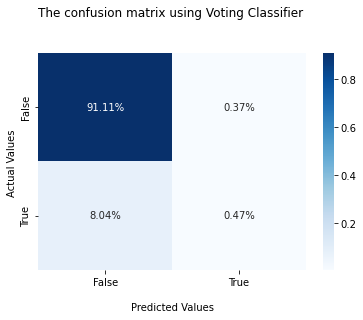

In [96]:
cmatrix_fun("Voting", y_test, y_pred_test_v_clf)

In [97]:
classification_report_fun("Voting", y_test_res, y_pred_test_res_v_clf)

The Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78     58461
           1       0.77      0.80      0.78     58508

    accuracy                           0.78    116969
   macro avg       0.78      0.78      0.78    116969
weighted avg       0.78      0.78      0.78    116969

